In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [157]:
import os

os.chdir('C:\\Users\\gmoor\\Documents\\Applied Microeconomics\\Data')

df = pd.read_excel('Washington County Single Family Rentals for five years.xlsx', sheet_name='Washington County Single Family')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   #               3487 non-null   int64         
 1   ML#             3487 non-null   int64         
 2   St              3487 non-null   object        
 3   PT              3487 non-null   object        
 4   Address         3487 non-null   object        
 5   Zip Code        3487 non-null   int64         
 6   Town            3487 non-null   object        
 7   Sub Type        3487 non-null   object        
 8   List Price      3487 non-null   int64         
 9   $               19 non-null     object        
 10  Deposit         3132 non-null   float64       
 11  Date Available  3487 non-null   datetime64[ns]
 12  Beds Total      3487 non-null   int64         
 13  Heated SF /GBA  3487 non-null   int64         
 14  Sold Price      3420 non-null   float64       
 15  Agen

In [159]:
# Initial data exploration
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nData Types:\n', df.dtypes)

Dataset Shape: (3487, 17)

Columns: ['#', 'ML#', 'St', 'PT', 'Address', 'Zip Code ', 'Town', 'Sub Type', 'List Price', '$', 'Deposit', 'Date Available', 'Beds Total', 'Heated SF /GBA', 'Sold Price', 'Agent Name', 'Office']

Data Types:
 #                          int64
ML#                        int64
St                        object
PT                        object
Address                   object
Zip Code                   int64
Town                      object
Sub Type                  object
List Price                 int64
$                         object
Deposit                  float64
Date Available    datetime64[ns]
Beds Total                 int64
Heated SF /GBA             int64
Sold Price               float64
Agent Name                object
Office                    object
dtype: object


In [160]:
# Basic Statistics for numerical column
numeric_stats = df[['List Price', 'Deposit', 'Beds Total', 'Heated SF /GBA', 'Sold Price']].describe()

print("\nBasic Statistics:\n", numeric_stats)


Basic Statistics:
          List Price       Deposit   Beds Total  Heated SF /GBA    Sold Price
count   3487.000000   3132.000000  3487.000000     3487.000000   3420.000000
mean    1464.053054   1441.798531     3.084313     1596.260683   1453.427485
std      474.890955    667.019159     0.559488      505.180729    508.757658
min      550.000000      0.000000     1.000000      416.000000    550.000000
25%     1200.000000   1150.000000     3.000000     1322.000000   1200.000000
50%     1400.000000   1395.000000     3.000000     1520.000000   1400.000000
75%     1650.000000   1600.000000     3.000000     1792.000000   1625.000000
max    14200.000000  18001.000000     6.000000     7200.000000  18800.000000


In [161]:
# Missing values analysis
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 #                    0
ML#                  0
St                   0
PT                   0
Address              0
Zip Code             0
Town                 0
Sub Type             0
List Price           0
$                 3468
Deposit            355
Date Available       0
Beds Total           0
Heated SF /GBA       0
Sold Price          67
Agent Name           0
Office               0
dtype: int64


In [162]:
# Convert Date Available to datetime
df['Date Available'] = pd.to_datetime(df['Date Available'])

# Price per square foot calcuation
df['Price_Per_SF'] = df['List Price'] / df['Heated SF /GBA']


City-wise Statistics:
               List Price                           Heated SF /GBA          \
                   count     mean  median      std           mean  median   
Town                                                                        
Bentonville            4  1753.75  1762.5   142.15        1804.00  1858.0   
Elkins                33  1197.42  1195.0   214.29        1506.94  1460.0   
Farmington           140  1492.89  1485.0   384.14        1575.44  1487.5   
Fayetteville        2554  1493.99  1400.0   488.67        1591.09  1510.0   
Lincoln                9   866.11   895.0   120.90        1175.11  1186.0   
Lowell                 2  1847.50  1847.5   208.60        3406.00  3406.0   
Prairie Grove         65  1429.23  1450.0   230.92        1488.48  1460.0   
Springdale           646  1348.95  1300.0   423.51        1626.30  1560.5   
Tontitown             22  1926.59  1825.0   285.86        1796.14  1716.0   
West Fork             11  1328.18   975.0  1061.21  

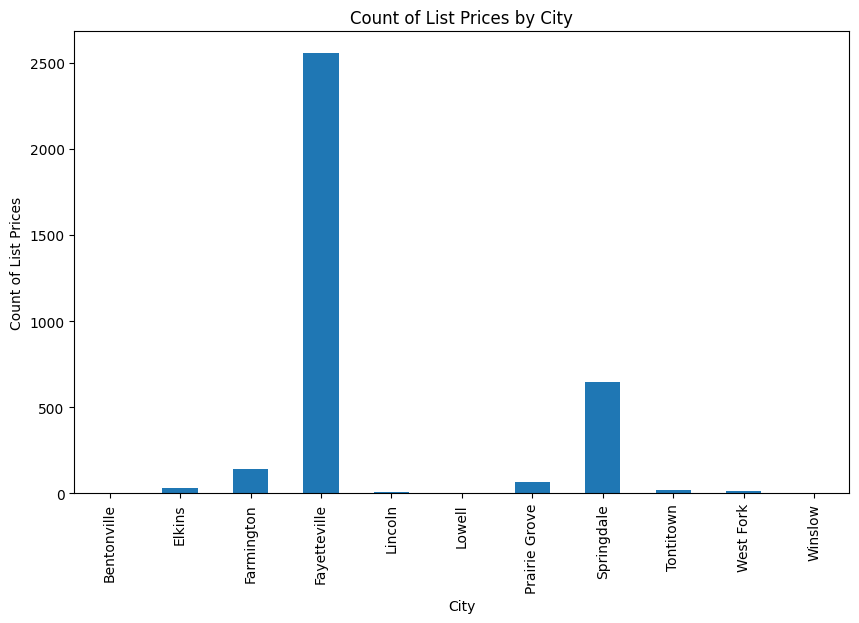

In [163]:
# Summary statistics by city
city_stats = df.groupby('Town').agg({
    'List Price': ['count', 'mean', 'median', 'std'],
    'Heated SF /GBA': ['mean', 'median'],
    'Price_Per_SF': ['mean', 'median'],
    'Beds Total': 'mean'
}).round(2)

print("\nCity-wise Statistics:\n", city_stats)

city_stats[('List Price', 'count')].plot(kind='bar', figsize=(10, 6), title='Count of List Prices by City')
plt.ylabel('Count of List Prices')
plt.xlabel('City')
plt.show()

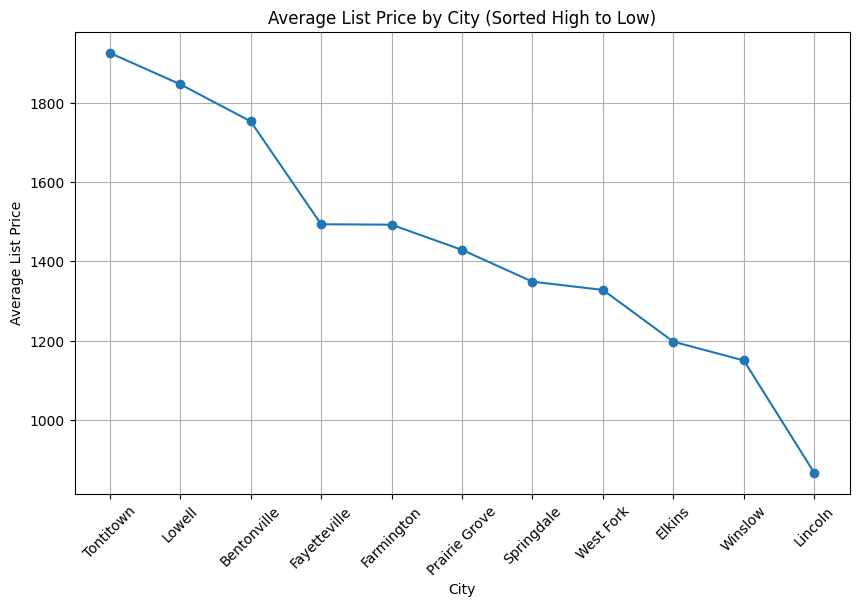

In [171]:
city_stats_sorted = city_stats.sort_values(('List Price', 'mean'), ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(city_stats_sorted.index, city_stats_sorted[('List Price', 'mean')], marker='o')
plt.title('Average List Price by City (Sorted High to Low)')
plt.ylabel('Average List Price')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

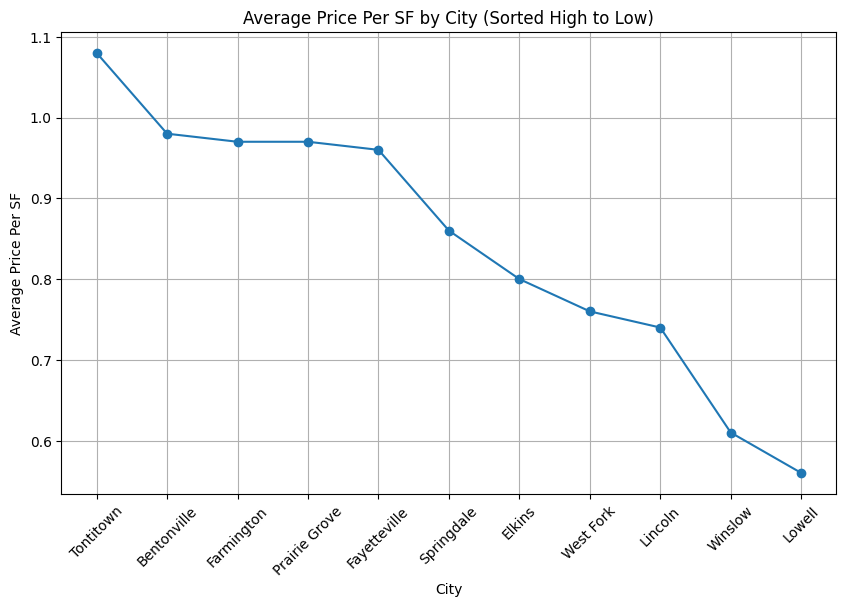

In [165]:
# Plotting Price_Per_SF mean
city_stats_sorted = city_stats.sort_values(('Price_Per_SF', 'mean'), ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(city_stats_sorted.index, city_stats_sorted[('Price_Per_SF', 'mean')], marker='o')
plt.title('Average Price Per SF by City (Sorted High to Low)')
plt.ylabel('Average Price Per SF')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


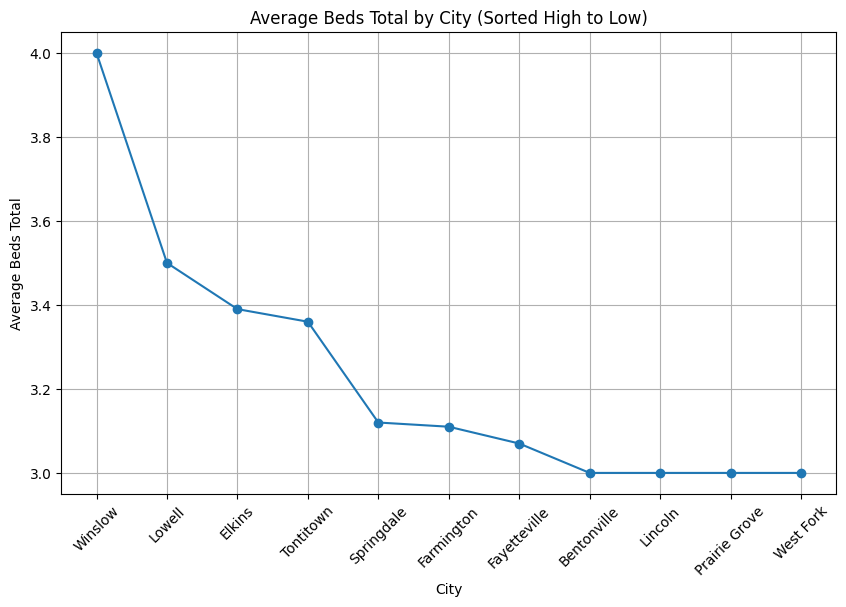

In [176]:
# Plotting Beds Total mean
city_stats_sorted = city_stats.sort_values(('Beds Total', 'mean'), ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(city_stats_sorted.index, city_stats_sorted[('Beds Total', 'mean')], marker='o')
plt.title('Average Beds Total by City (Sorted High to Low)')
plt.ylabel('Average Beds Total')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Temporal Trends:
 Year_Month
2017-05    1466.666667
2017-06    1700.000000
2017-07    1995.000000
2017-09    1443.333333
2017-10    1406.666667
              ...     
2023-01    1842.000000
2023-02    1722.500000
2023-03    2025.000000
2023-12     900.000000
2024-01    1475.000000
Freq: M, Name: List Price, Length: 72, dtype: float64


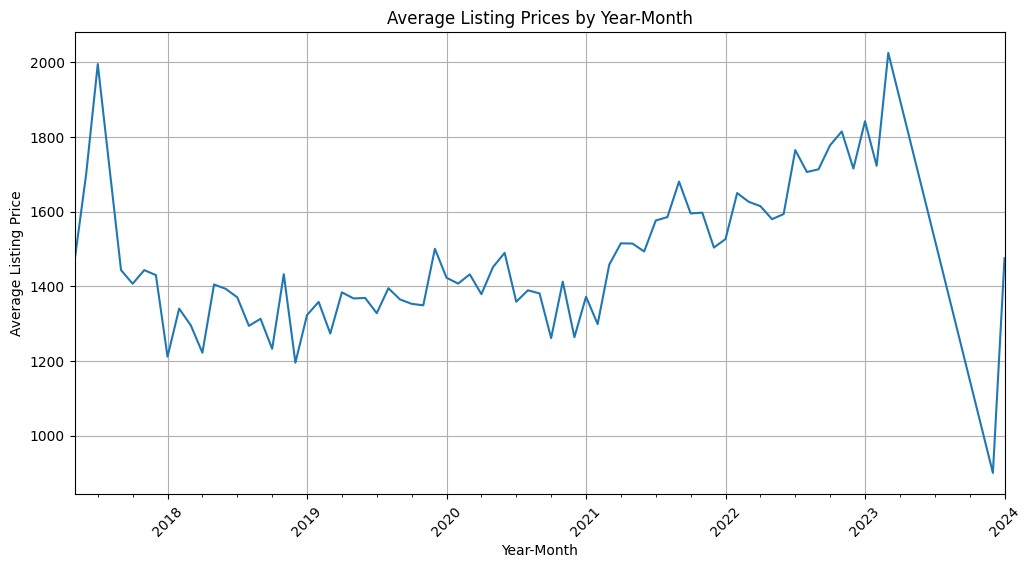

In [167]:
# Temproal analysis - average price by year-month
df['Year_Month'] = df['Date Available'].dt.to_period('M')
temporal_trends = df.groupby('Year_Month')['List Price'].mean()
print("\nTemporal Trends:\n", temporal_trends)

temporal_trends.plot(figsize=(12, 6))
plt.title('Average Listing Prices by Year-Month')
plt.ylabel('Average Listing Price')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [168]:
correlation = df['Heated SF /GBA'].corr(df['Price_Per_SF'])
print("Correlation between 'Heated SF / GBA' and 'Price per square foot':", correlation)

Correlation between 'Heated SF / GBA' and 'Price per square foot': -0.3170001280306065


In [177]:
correlation_beds_list_price = df['Beds Total'].corr(df['List Price'])
print("Correlation between 'Beds Total' and 'List Price':", correlation_beds_list_price)

Correlation between 'Beds Total' and 'List Price': 0.4572535301270304
